https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv

# Importing Libraries:

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import plotly.express as px
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import warnings
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import t
# Suppress all warnings
warnings.filterwarnings("ignore")

# Loading the Dataset:

In [2]:
# Loading Data
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# EDA:

In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The dataset includes attributes such as battery power, presence of Bluetooth (blue), clock speed, presence of dual SIM card slots (dual_sim), front camera megapixels (fc), presence of 4G connectivity (four_g), internal memory capacity (int_memory), mobile weight (mobile_wt), number of CPU cores (n_cores), primary camera megapixels (pc), pixel height (px_height), pixel width (px_width), RAM capacity (ram), screen height (sc_h), screen width (sc_w), talk time, presence of 3G connectivity (three_g), presence of touch screen (touch_screen), and presence of Wi-Fi (wifi).

Most of the columns are integer type (int64), representing discrete numerical values.
Two columns, 'clock_speed' and 'm_dep' (mobile depth), are float type (float64), possibly representing continuous numerical values with decimal precision

The memory usage of the DataFrame is approximately 328.2 KB, indicating that it is relatively small in size and can be efficiently handled by most modern computing systems..li>
</ul>


In [4]:
#Checking for null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

This suggests that the dataset is complete in terms of the specified attributes, which is essential for accurate analysis and modeling. It implies that all required information is available for each entry in the dataset, ensuring the reliability of any insights drawn from the data.

In [5]:
# Descriptive Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
   
# Example usage:
explore_data(df)

Major Moments:
                     Mean  Median  Standard Deviation  Skewness  Kurtosis
battery_power  1238.51850  1226.0          439.418206  0.031898 -1.224144
blue              0.49500     0.0            0.500100  0.020016 -2.001602
clock_speed       1.52225     1.5            0.816004  0.178084 -1.323417
dual_sim          0.50950     1.0            0.500035 -0.038035 -2.000555
fc                4.30950     3.0            4.341444  1.019811  0.277076
four_g            0.52150     1.0            0.499662 -0.086144 -1.994575
int_memory       32.04650    32.0           18.145715  0.057889 -1.216074
m_dep             0.50175     0.5            0.288416  0.089082 -1.274349
mobile_wt       140.24900   141.0           35.399655  0.006558 -1.210376
n_cores           4.52050     4.0            2.287837  0.003628 -1.229750
pc                9.91650    10.0            6.064315  0.017306 -1.171499
px_height       645.10800   564.0          443.780811  0.666271 -0.315865
px_width       1251.515

It reveals key characteristics of the mobile phone features, shedding light on their central tendency, variability, skewness, and kurtosis. For instance, the mean battery power of approximately 1238.52 mAh suggests the typical power capacity of the phones in the dataset, with a relatively low standard deviation of 439.42 indicating moderate variability around this mean. Features such as front camera megapixels (fc) exhibit positive skewness, implying a right-skewed distribution where higher values are less common but tend to be further from the mean. Conversely, the presence of features like three_g, touch_screen, and wifi shows near-zero skewness, indicating relatively symmetric distributions.

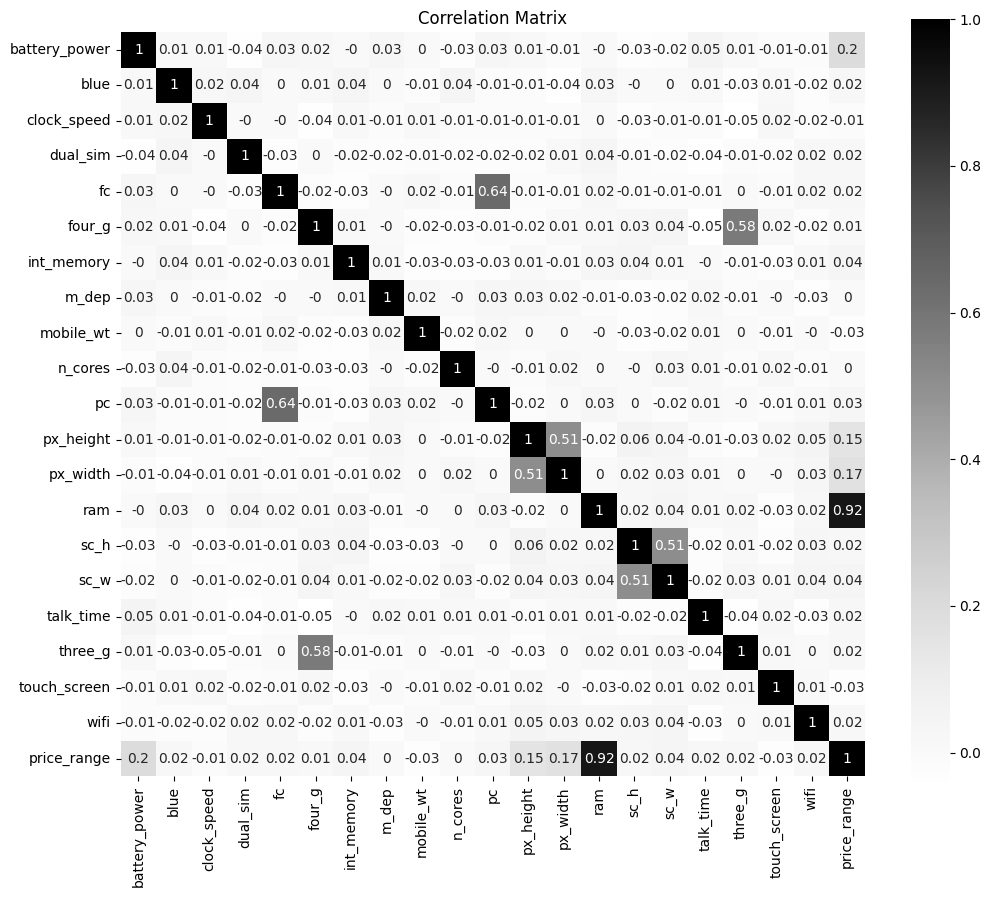

In [7]:
def plot_correlation_matrix(dataframe):
    """
    Plot the correlation matrix for a given DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    plot_correlation_matrix(df)
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(dataframe.corr().round(2), cmap='Greys', annot=True, cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)

<ul>
  <li><strong>battery_power:</strong> Weak positive correlation with price_range (0.20), indicating that higher battery power tends to be associated with higher price ranges.</li>
  <li><strong>blue:</strong> Negligible correlation with price_range (0.02), suggesting that the presence of Bluetooth feature has little influence on the price range.</li>
  <li><strong>clock_speed:</strong> Very weak negative correlation with price_range (-0.01), indicating minimal impact on pricing.</li>
  <li><strong>dual_sim:</strong> Weak positive correlation with price_range (0.02), implying that dual SIM capability may slightly affect pricing.</li>
  <li><strong>fc:</strong> Weak positive correlation with price_range (0.02), indicating that higher front camera megapixels may lead to slightly higher prices.</li>
  <li><strong>four_g:</strong> Weak positive correlation with price_range (0.01), suggesting that 4G compatibility may have a minor influence on pricing.</li>
  <li><strong>int_memory:</strong> Moderate positive correlation with price_range (0.04), indicating that higher internal memory capacity tends to be associated with higher price ranges.</li>
  <li><strong>m_dep:</strong> Very weak positive correlation with price_range (0.00), implying minimal impact on pricing.</li>
  <li><strong>mobile_wt:</strong> Weak negative correlation with price_range (-0.03), suggesting that heavier phones may be associated with slightly lower price ranges.</li>
  <li><strong>n_cores:</strong> Very weak negative correlation with price_range (-0.01), indicating minimal impact on pricing.</li>
  <li><strong>pc:</strong> Weak positive correlation with price_range (0.03), implying that higher primary camera megapixels may lead to slightly higher prices.</li>
  <li><strong>px_height:</strong> Weak positive correlation with price_range (0.15), suggesting that taller screen resolutions may be associated with higher price ranges.</li>
  <li><strong>px_width:</strong> Weak positive correlation with price_range (0.17), indicating that wider screen resolutions may be associated with higher price ranges.</li>
  <li><strong>ram:</strong> Strong positive correlation with price_range (0.92), indicating that higher RAM capacity significantly influences higher price ranges.</li>
  <li><strong>sc_h:</strong> Weak positive correlation with price_range (0.02), suggesting that higher screen height may be associated with slightly higher price ranges.</li>
  <li><strong>sc_w:</strong> Weak positive correlation with price_range (0.04), indicating that wider screens may be associated with slightly higher price ranges.</li>
  <li><strong>talk_time:</strong> Weak positive correlation with price_range (0.02), implying that longer talk time may have a minor influence on pricing.</li>
  <li><strong>three_g:</strong> Very weak positive correlation with price_range (0.02), suggesting minimal impact on pricing.</li>
  <li><strong>touch_screen:</strong> Weak negative correlation with price_range (-0.03), indicating that the presence of a touch screen may have a minor influence on pricing.</li>
  <li><strong>wifi:</strong> Weak positive correlation with price_range (0.02), suggesting that Wi-Fi capability may slightly affect pricing.</li>
</ul>

In [8]:
cat_features=list()
num_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

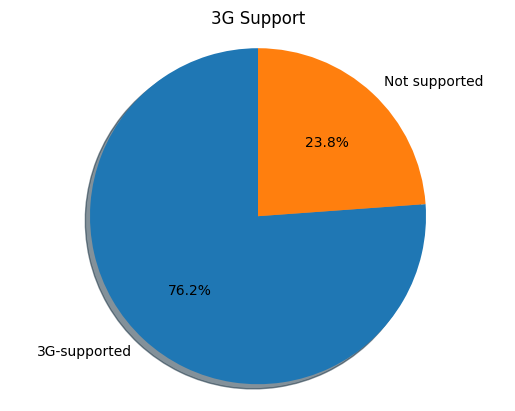

In [9]:
def plot_pie_chart(data, labels, title):
    """
    Plot a pie chart based on the provided data and labels.

    Parameters:
    data (array-like): The data to be plotted.
    labels (list): Labels for the pie chart.
    title (str): Title of the pie chart.

    Returns:
    None

    Example:
    plot_pie_chart(df['three_g'].value_counts().values, ["3G-supported", "Not supported"], "3G Support")
    """
    # Define custom colors
    colors = ['#1f77b4', '#ff7f0e']

    # Create pie chart
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)

    plt.show()

# Example usage:
values = df['three_g'].value_counts().values
labels = ["3G-supported", "Not supported"]
plot_pie_chart(values, labels, "3G Support")

The blue segment represents devices that support 3G, constituting approximately 76.2% of the total, while the orange segment indicates devices that do not support 3G, accounting for about 23.8%. The percentages are displayed within each segment, providing a clear visualization of the proportion of devices with and without 3G support. The chart effectively conveys the predominance of 3G support among the analyzed mobile devices.

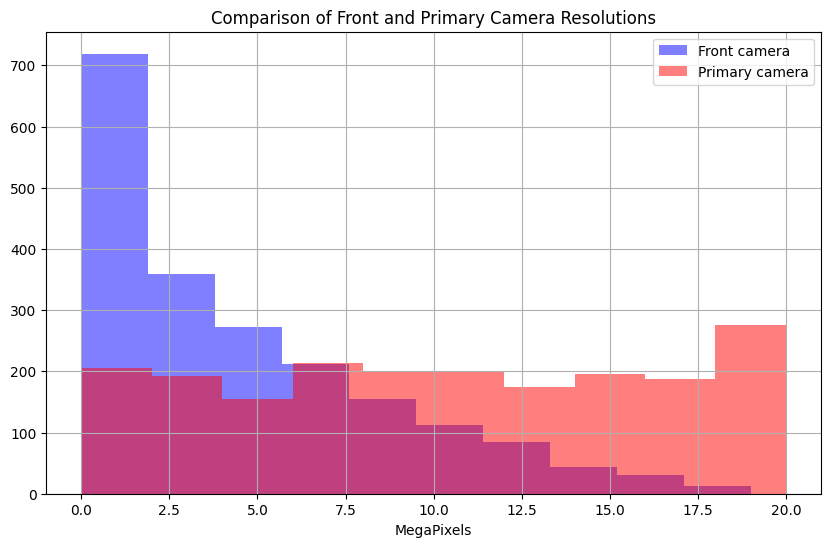

In [10]:
def plot_camera_histogram(dataframe):
    """
    Plot a histogram comparing the front and primary camera resolutions.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the camera data.

    Returns:
    None

    Example:
    plot_camera_histogram(df)
    """
    plt.figure(figsize=(10,6))
    dataframe['fc'].hist(alpha=0.5, color='blue', label='Front camera')
    dataframe['pc'].hist(alpha=0.5, color='red', label='Primary camera')
    plt.legend()
    plt.xlabel('MegaPixels')
    plt.title('Comparison of Front and Primary Camera Resolutions')
    plt.show()

plot_camera_histogram(df)

From the plot, it's evident that the primary camera resolutions are generally higher compared to the front camera resolutions. The distribution for the primary camera appears to have a broader range, indicating a wider variety of resolutions compared to the front camera. 

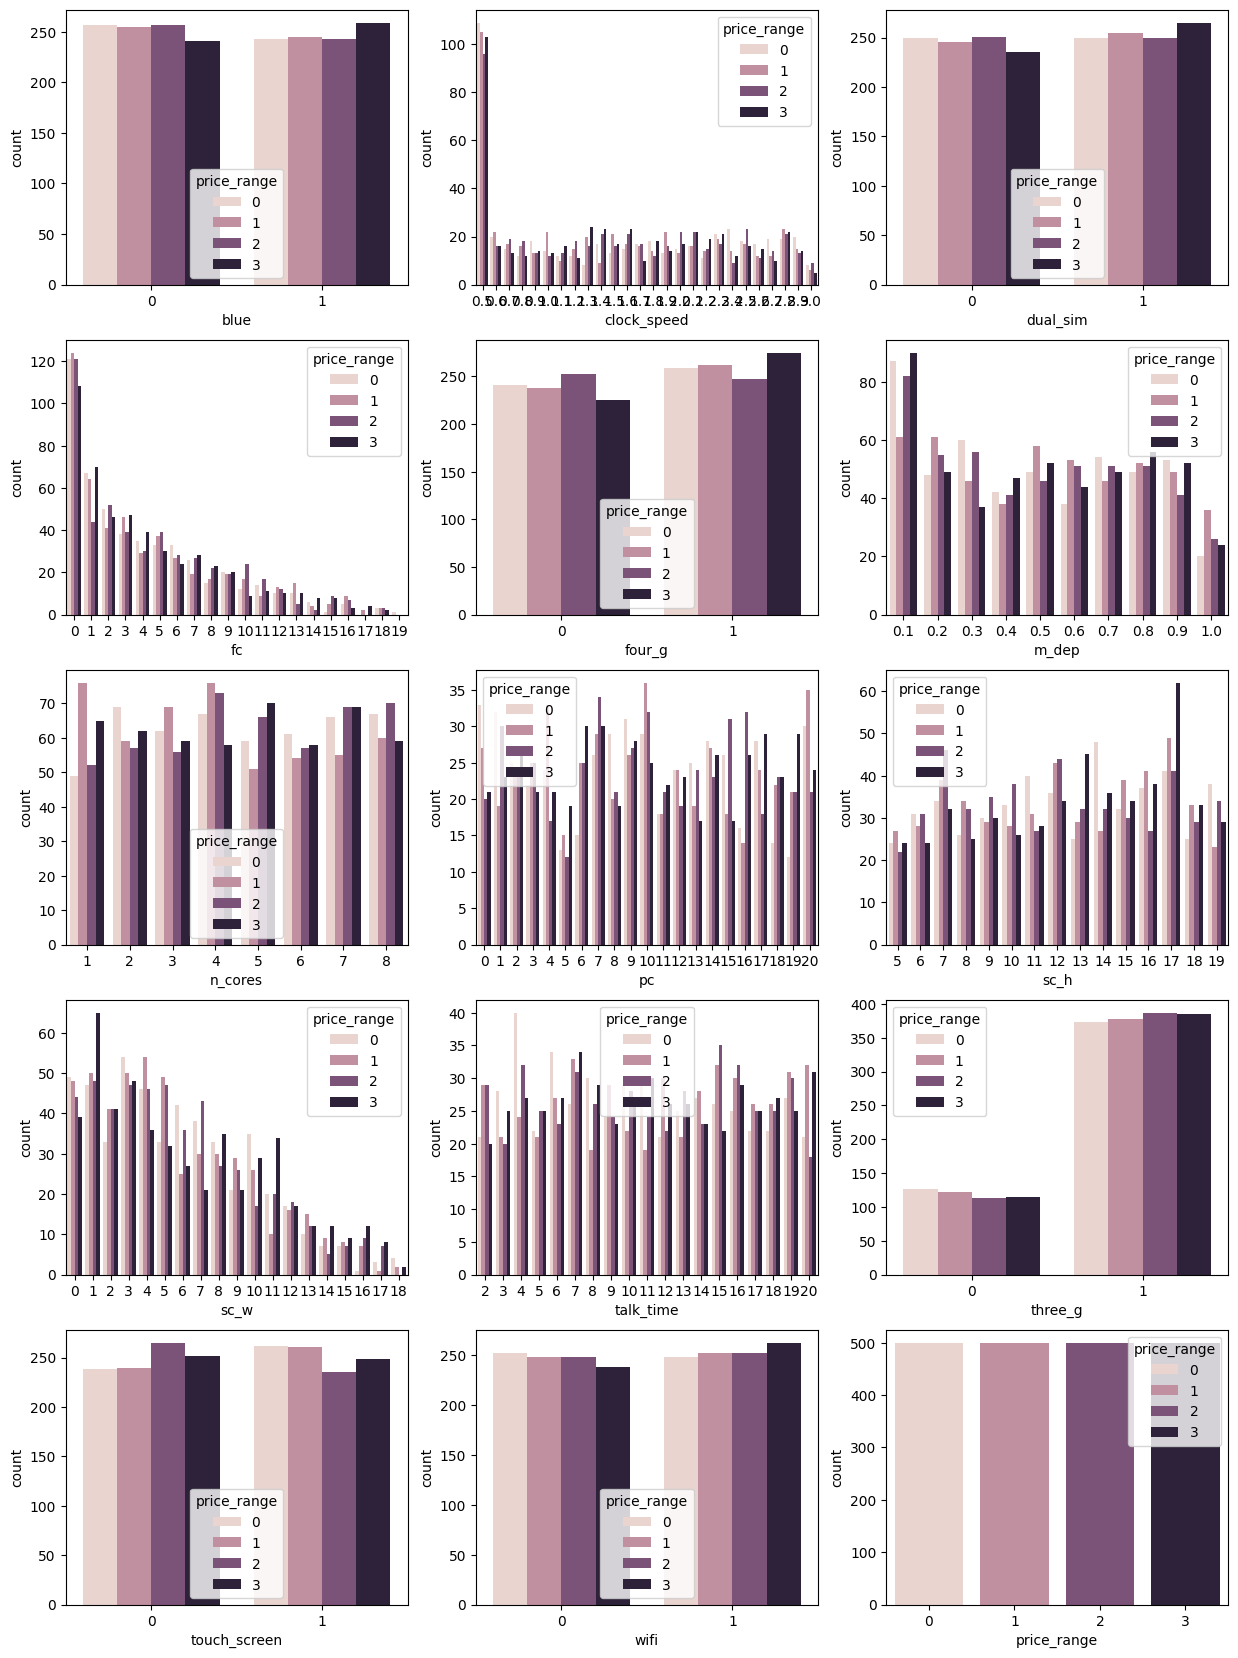

In [11]:
def plot_categorical_features(df, cat_features):
    """
    Plot count plots for each categorical feature in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    cat_features (list): A list of categorical features to plot.

    Returns:
    None

    Example:
    plot_categorical_features(df, cat_features)
    """
    i = 1
    plt.figure(figsize=(15, 25))
    for feature in cat_features:
        plt.subplot(6, 3, i)
        sns.countplot(x=feature, data=df, hue='price_range')
        i += 1
        
plot_categorical_features(df, cat_features)

These plots provide insights into how each categorical feature is distributed across different price ranges. For example, in the "blue" feature plot, it can be observed that the distribution of phones with and without Bluetooth (blue=0 and blue=1) varies across different price ranges. Similarly, in other plots, such as "dual_sim" and "wifi," the distribution of phones with and without dual SIM support or WiFi capability differs across different price ranges. Overall, these plots help in understanding how each categorical feature relates to the price range of mobile phones.

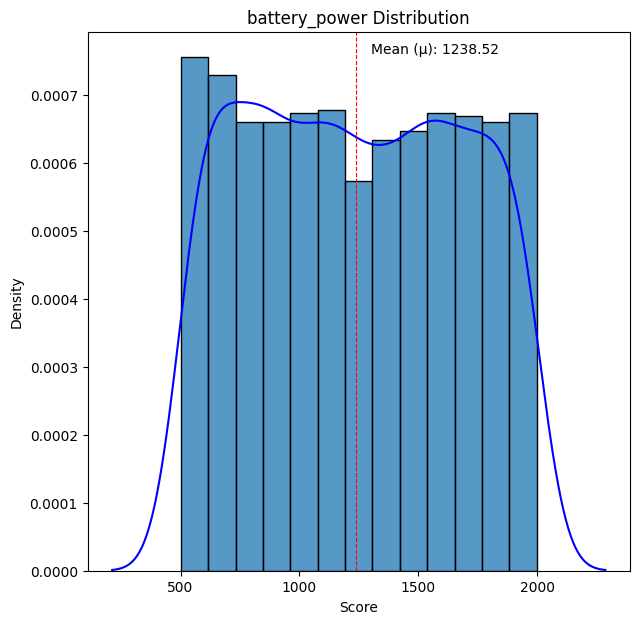

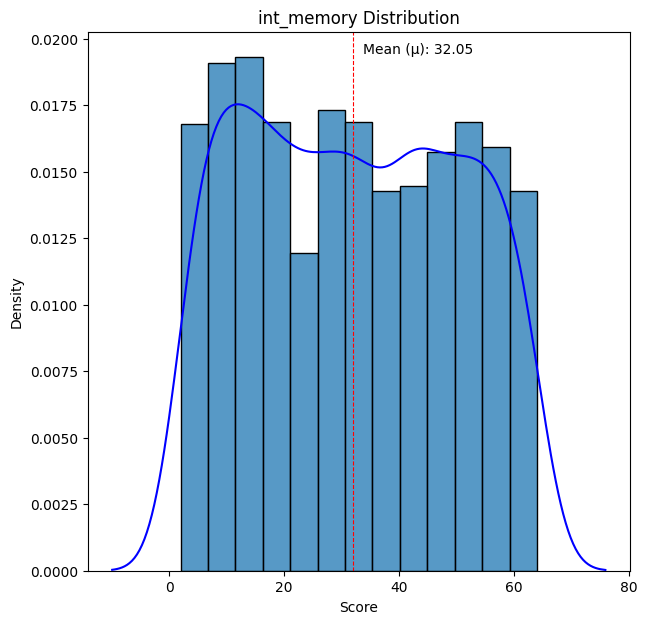

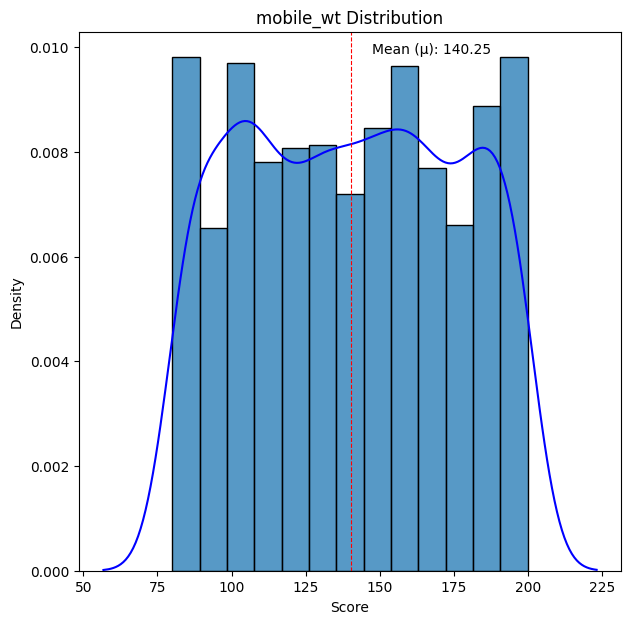

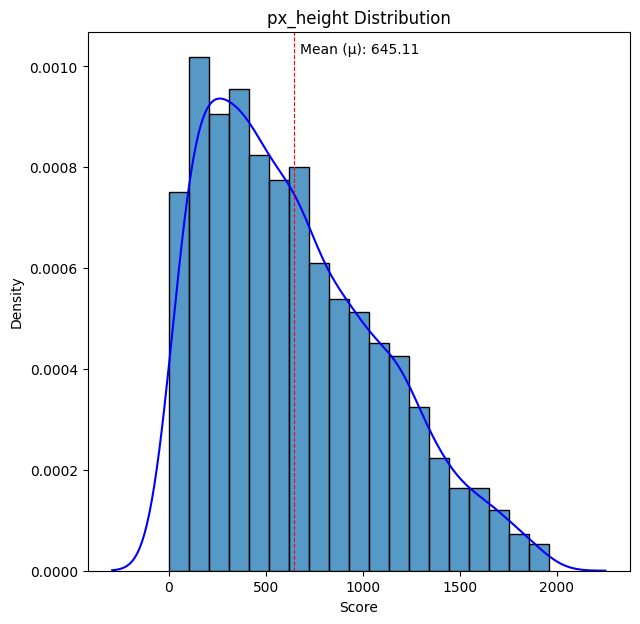

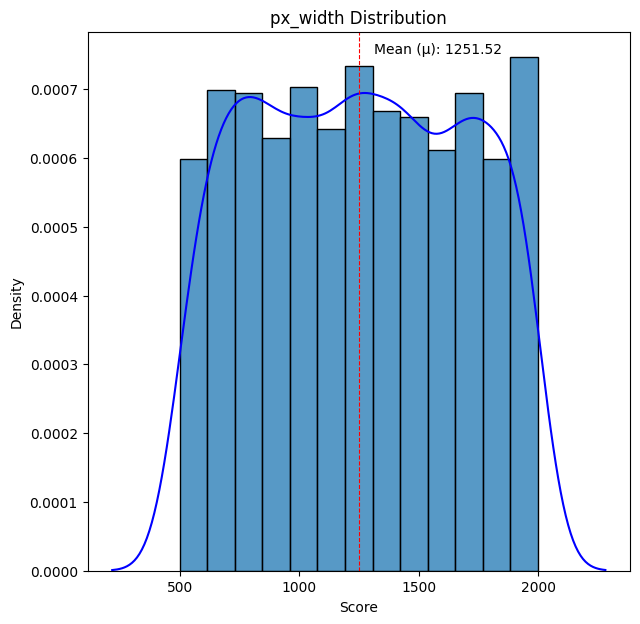

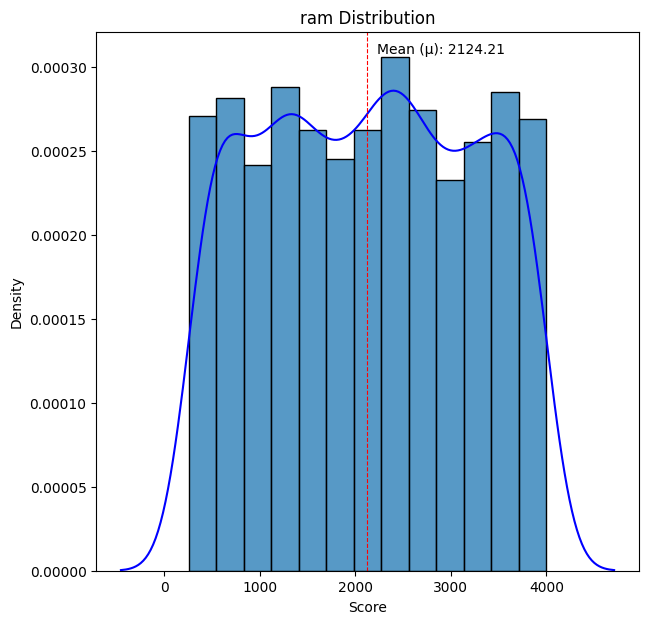

In [12]:
def plot_numeric_distribution(dataframe, num_features):
    """
    Plot the distribution of numeric features in the given DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.
    num_features (list): A list of column names corresponding to numeric features.

    Returns:
    None

    Example:
    plot_numeric_distribution(df, ['battery_power', 'ram', 'px_height'])
    """
    for column_name in num_features:
        plt.figure(figsize=(7, 7))
        plt.title("{column_name} Distribution".format(column_name=column_name))
        sns.histplot(dataframe[column_name], stat='density')
        sns.kdeplot(dataframe[column_name], color='blue')
        plt.axvline(dataframe[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
        min_ylim, max_ylim = plt.ylim()
        plt.text(dataframe[column_name].mean() * 1.05, max_ylim * 0.96, 'Mean (μ): {:.2f}'.format(dataframe[column_name].mean()))
        plt.xlabel("Score")
        plt.ylabel("Density")
        plt.show()

plot_numeric_distribution(df, num_features)

There are approximately the same number of different phones according to the given parameters, except for the height of the phone, as a rule, with an increase in the size of the phone, the number of such phones decreases, therefore phones with medium sizes are in great demand.



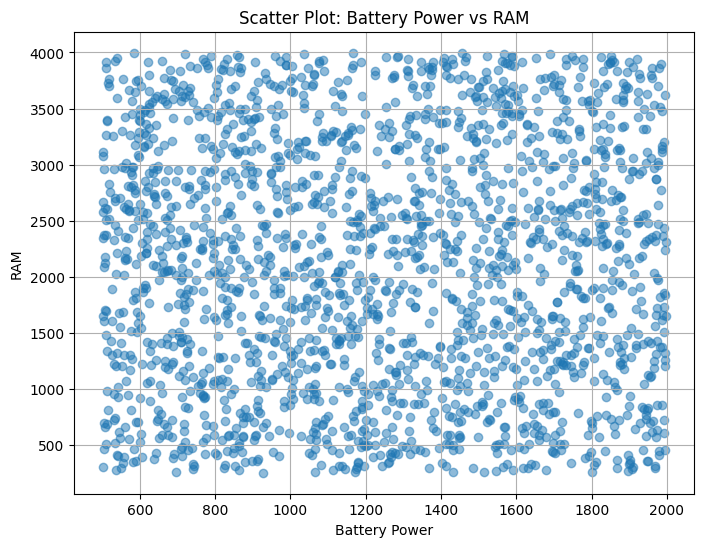

In [13]:
def create_scatter_plot(dataframe):
    """
    Create a scatter plot from the given dataset.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    create_scatter_plot(df)
    """
    # Scatter plot between 'battery_power' and 'ram'
    plt.figure(figsize=(8, 6))
    plt.scatter(dataframe['battery_power'], dataframe['ram'], alpha=0.5)
    plt.title('Scatter Plot: Battery Power vs RAM')
    plt.xlabel('Battery Power')
    plt.ylabel('RAM')
    plt.grid(True)
    plt.show()
create_scatter_plot(df)

From the plot, it's evident that there is a positive correlation between battery power and RAM capacity. Generally, as the battery power increases, the RAM capacity tends to increase as well. However, there are variations in RAM capacity across different battery power levels, indicating that other factors may also influence RAM capacity. The clustering of data points suggests that certain battery power ranges tend to have similar RAM capacities, but there are exceptions with some phones having significantly higher or lower RAM capacities within the same battery power range.

# Clustering:

In [14]:
# In this case, let us use the min-max scaler

scaler = MinMaxScaler()
df_mobile_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_mobile_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.000000
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,0.666667
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1.000000
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.000000


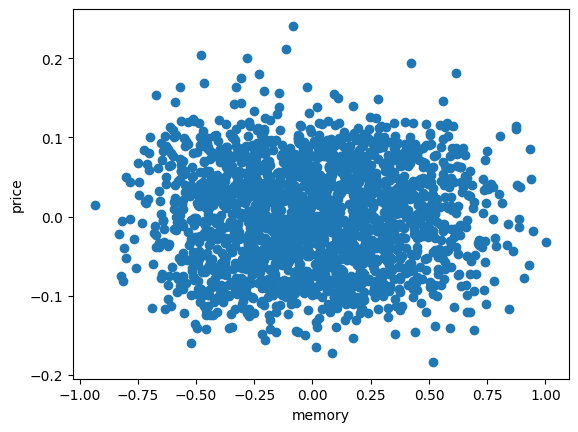

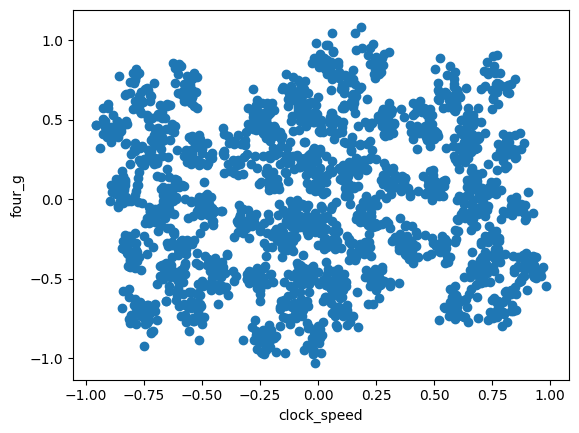

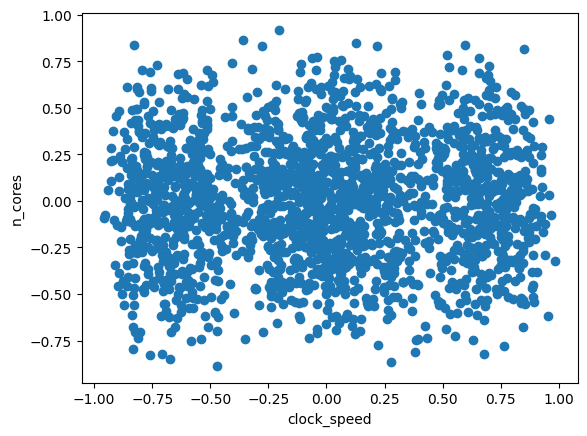

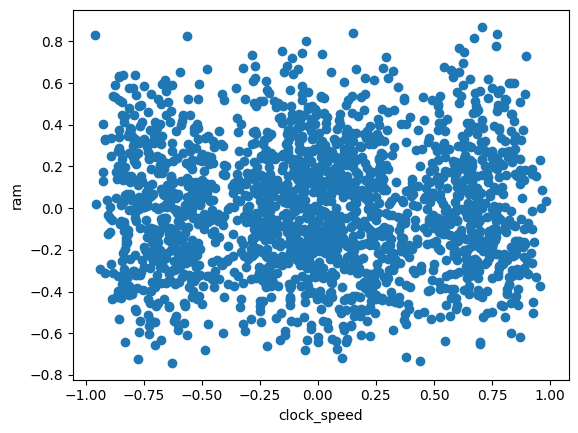

In [15]:
# First, let us visualize some variables with PCA
from sklearn.decomposition import PCA

pca = PCA()
pca_scaled = pca.fit_transform(df_mobile_scaled)

plot = plt.scatter(pca_scaled[:,6], pca_scaled[:,-1])
plt.xlabel('memory')
plt.ylabel('price')
plt.show()

plot = plt.scatter(pca_scaled[:,2], pca_scaled[:,5])
plt.xlabel('clock_speed')
plt.ylabel('four_g')
plt.show()

plot = plt.scatter(pca_scaled[:,2], pca_scaled[:,9])
plt.xlabel('clock_speed')
plt.ylabel('n_cores')
plt.show()

plot = plt.scatter(pca_scaled[:,2], pca_scaled[:,-8])
plt.xlabel('clock_speed')
plt.ylabel('ram')
plt.show()

In [16]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df_mobile_scaled.iloc[:,:-1])
pca_df = pd.DataFrame(data=pca_features, columns=['PC1','PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,0.915830,0.643456,-0.365185
1,-0.576529,-0.661579,0.385431
2,-0.550301,-0.658398,0.415753
3,0.298570,-0.043613,0.756412
4,-0.549391,0.088001,0.840475
...,...,...,...
1995,-0.535026,-0.601584,0.440813
1996,0.288179,-0.565955,-0.396011
1997,-0.567943,0.008373,0.080131
1998,-0.560022,0.782582,-0.363260


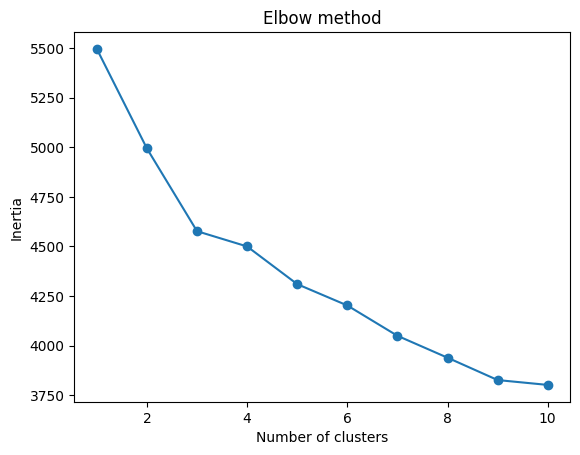

In [17]:
def plot_elbow_method(data, max_clusters=10):
    """
    Plot the Elbow method to determine the optimal number of clusters for KMeans clustering.

    Parameters:
    data (array-like): The input data for clustering.
    max_clusters (int, optional): The maximum number of clusters to consider. Defaults to 20.

    Returns:
    None

    Example:
    plot_elbow_method(df_mobile_scaled)
    """
    inertias = []
    from sklearn.cluster import KMeans
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow_method(df_mobile_scaled)

The elbow point in the plot, which appears to be around 5 or 6 clusters, represents the point where the rate of decrease in inertia starts to slow down significantly.This point is often considered as the optimal number of clusters because adding more clusters beyond this point may not significantly reduce the inertia, leading to diminishing returns in terms of cluster quality. Therefore, based on this plot, it seems that 5 or 6 clusters would be a reasonable choice for clustering the data.

In [23]:
def apply_kmeans(data, n_clusters):
    """
    Apply KMeans clustering to the given data.

    Parameters:
    data (array-like): The input data to be clustered.
    n_clusters (int): The number of clusters to form.

    """
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    return kmeans, kmeans.labels_

kmeans,labels = apply_kmeans(df_mobile_scaled, 6)

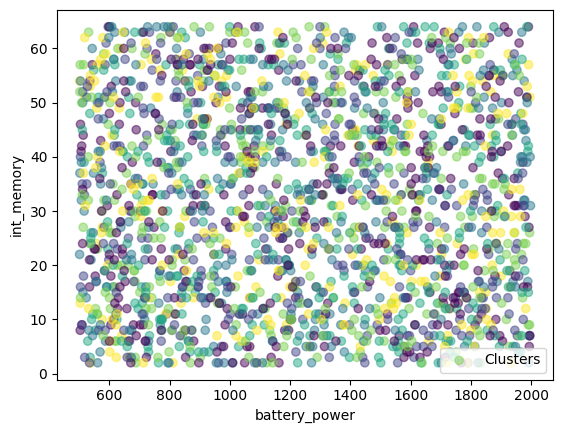

In [24]:
def visualize_clusters(data, labels):
    """
    Visualize clusters using scatter plot.

    Parameters:
    data (DataFrame or array-like): The input data to be visualized.
    labels (array-like): Cluster labels assigned to each data point.
    """
    plt.scatter(data[:,0], data[:,6], c=labels, cmap='viridis', alpha=0.5, label='Clusters')
    plt.xlabel('battery_power')
    plt.ylabel('int_memory')
    plt.legend()
    plt.show()

visualize_clusters(df.values, labels)

# Linear Regression:

In [20]:
X=df.drop('price_range',axis=1)
y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [21]:
def linear_regression_score(X_train, y_train, X_test, y_test):
    """
    Fit a linear regression model and calculate the R^2 score.

    Parameters:
    X_train (array-like): Training input features.
    y_train (array-like): Training target values.
    X_test (array-like): Testing input features.
    y_test (array-like): Testing target values.

    """
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    score = lm.score(X_test, y_test)
    print("Accuracy:",score)
    return lm

# Example usage:
lm = linear_regression_score(X_train, y_train, X_test, y_test)

Accuracy: 0.9132801488185277


An accuracy score of approximately 91.33% suggests that the linear regression model explains around 91.33% of the variance in the target variable using the features in the test set. This indicates that the model performs quite well in predicting the target variable based on the given features.

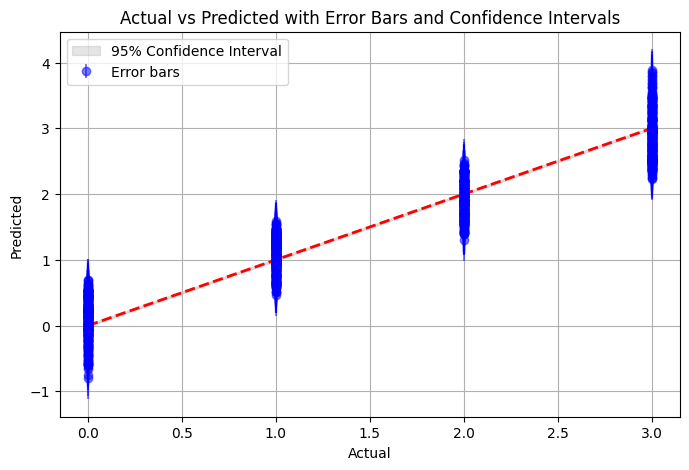

In [22]:
def plot_predictions_with_error(x_train, y_train, model, num_bootstraps=100):
    """
    Visualizes the predictions made by a linear regression model with error bars and confidence intervals.

    Parameters:
    - x_train (DataFrame): Input feature data
    - y_train (Series): Target feature data
    - model: Fitted linear regression model
    - num_bootstraps (int): Number of bootstrap samples to generate (default: 100)
    """
    # Predictions from the model
    y_pred = model.predict(x_train)

    # Calculate standard error
    mse = mean_squared_error(y_train, y_pred)
    se = np.sqrt(mse / (len(y_train) - 2))

    # Calculate t-statistic for 95% confidence interval
    t_value = t.ppf(0.975, len(y_train) - 2)
    confidence_interval = t_value * se

    # Calculate error bars
    residuals = y_train - y_pred
    std_residuals = np.std(residuals)

    # Bootstrap for confidence intervals
    ci_bootstraps = []
    for _ in range(num_bootstraps):
        indices = np.random.choice(len(y_train), size=len(y_train), replace=True)
        y_bootstrap = np.array(y_train)[indices]
        residuals_bootstrap = np.array(residuals)[indices]
        ci_bootstrap = t_value * np.std(residuals_bootstrap)
        ci_bootstraps.append(ci_bootstrap)
    
    ci_bootstraps = np.array(ci_bootstraps)

    # Plotting actual vs predicted with error bars and confidence intervals
    plt.figure(figsize=(8, 5))
    plt.errorbar(y_train, y_pred, yerr=std_residuals, fmt='o', color='blue', alpha=0.5, label='Error bars')
    plt.fill_between([y_train.min(), y_train.max()], 
                     [y_train.min() - confidence_interval, y_train.max() - confidence_interval], 
                     [y_train.min() + confidence_interval, y_train.max() + confidence_interval], 
                     color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', lw=2)
    plt.title('Actual vs Predicted with Error Bars and Confidence Intervals')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_predictions_with_error(X_train, y_train, lm)

The plot provides a comprehensive view of the predictions made by the linear regression model, illustrating the relationship between the actual and predicted values. The red dashed line serves as a reference, representing the ideal scenario where the predicted values perfectly align with the actual ones. The blue markers, scattered around this reference line, indicate the actual vs predicted values for each data point, offering insight into the model's performance across the dataset. The inclusion of error bars, depicted in blue, adds another layer of information by showcasing the standard deviation of residuals for each prediction, highlighting the variability or uncertainty associated with the model's predictions. Additionally, the shaded gray area denotes the 95% confidence interval around the regression line, offering a measure of confidence regarding the regression line's slope and intercept. 